In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy.optimize import curve_fit as cfit

In [2]:
#abrindo os arquivos, aqui eu tinha o arquivo original (.dat) e criei um novo no formato
#csv para poder mexer nos dados sem estragar o original
original = open('/home/henrique/Documentos/TCC/dados/grb_190114C/swift-xrt/flux_plain.dat','r+')
copy = open('/home/henrique/Documentos/TCC/dados/grb_190114C/swift-xrt/flux_plain_copy.csv','w+')


#criando uma lista para poder armazenar as informações e coloca-las no arquivo
#readlines pega todo o arquivo e transforma em uma lista com cada linha sendo um elemento
dados = original.readlines()

#importante para que ao tentar excluir a linha não escreva em cima da antiga
original.close()

#com a lista criada eu coloquei cada elemento no arquivo (.csv) q eu criei la em cima
for linha in dados:
    
#essa parte eu usei pra tirar os espaços e colocar as virgulas no lugar pra o pandas
#conseguir ler
    linha_2 = re.sub('\s+',',',linha.strip())
    
#aqui eu fui no arquivo original e coloquei o ! pra ficar de marcador todas as linhas
#que eu queria eliminar(aqui q ficou a gambiarra), mas na prática foi bem rápido de fazer
# eu coloquei o \n para poder arrumar a linha, se não colocar fica tudo em uma linha só    
    if linha.startswith('!') == False:
        copy.write(linha_2 + '\n')

#toda essa primeira parte foi responsável por converter o arquivo para um formato csv
#para utilizar o pandas

Text(0.5, 1.0, 'Curva de luz em raios-x(0,3-10 keV) do GRB 130427A')

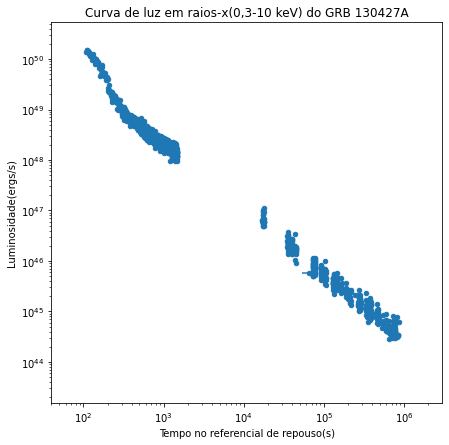

In [93]:
#aqui so abri o arquivo csv com o pandas
dados = pd.read_csv('/home/henrique/Documentos/TCC/dados/grb_130427A/swift-xrt/flux_plain_copy.csv')

z = 0.34
H_0 = 71/3.086e+24 #km/s cm
q_0 = -0.6
luminosity_distance = 3e5/H_0*z*(1+(1-q_0)*z/2) #cm

dados['Luminosity'] = 4*3.14159*luminosity_distance*luminosity_distance/(1+z)*dados['Flux']
dados['Time_rest'] = dados['Time']/(1+z)

#aqui é so o plot do gráfico
dados.plot.scatter(x = 'Time_rest', y='Luminosity',loglog=True, xlim = [40,2.973e+6],ylim = [1.537e+43,5.302e50]
,xerr = 'T_+ve',yerr = 'Fluxpos',figsize=(7,7))
plt.xlabel('Tempo no referencial de repouso(s)')
plt.ylabel('Luminosidade(ergs/s)')
plt.title('Curva de luz em raios-x(0,3-10 keV) do GRB 130427A')